## Observations and Insights

## Dependencies and starter code

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt;plt.rcdefaults()
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
drugstudy_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
# drugstudy_data.head(10)

Conclusions:
Comparing the results gathered for four drug treatments, Capomulin, Infurbinol, Ramicane, 
and Ceftamin,five main observations that can be made are:

1. Specimen mice given Capomulin and Ramicane regimens significantly outperformed the 
   the next best three treatments in every physiological response tested.  

2. Capomulin and Ramicane were the only treatments ,of the ten regimen, to show success in decreasing 
  tumor volumed reduction. The mice given these drugs showed a steady decline in tumor 
  volume, with a total decrease by an average of 19% over the course of the 45 day treatment.

3. Ketapril, Naftisol, and Stelasyn were equivalent or worse in effect than the placebo.

4. Ceftamin and Infubinol, were the next best regimen,AFTER Capomulin and Ramicane for 
  tumor volume reduction. 
   
5. When comparing with the placebo, the drugs Naftisol and Ketapril actually had a 
  negative effect on all physiological responses tested. The mice given the placebo had a 
  higher survival rate than those given Infubinol, and showed similar/slightly better results than Ketapril with respect to tumor 
  volume and spread of metastatic sites.[see Summary Statistics]


## Summary statistics

In [52]:
drugstudy_data_sort = drugstudy_data.sort_values(["Tumor Volume (mm3)"], ascending=True)
drugstudy_data_sort.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
28,x401,Capomulin,Female,16,15,40,28.167397,0
17,s185,Capomulin,Female,3,17,35,28.328531,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
drugstudy_group = drugstudy_data_sort.groupby(["Drug Regimen"])

drugstudy_mean = drugstudy_group["Tumor Volume (mm3)"].mean()

drugstudy_median = drugstudy_group["Tumor Volume (mm3)"].median()

drugstudy_variance = drugstudy_group["Tumor Volume (mm3)"].var()

drugstudy_std = drugstudy_group["Tumor Volume (mm3)"].std()

drugstudy_sem = drugstudy_group["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": drugstudy_mean, "Median":drugstudy_median, "Variance":drugstudy_variance, "Standard Deviation": drugstudy_std, "SEM": drugstudy_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

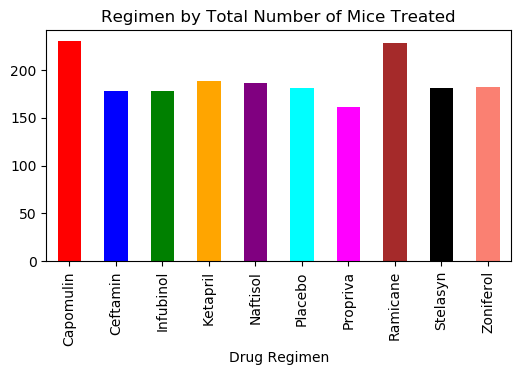

In [65]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_datapts = drugstudy_data.groupby(['Drug Regimen']).count()['Mouse ID']
color = ['red','blue','green','orange','purple','cyan','fuchsia','brown','black','salmon']
regimen_datapts.plot(kind='bar',color=color,figsize=(6,3), title = "Regimen by Total Number of Mice Treated");


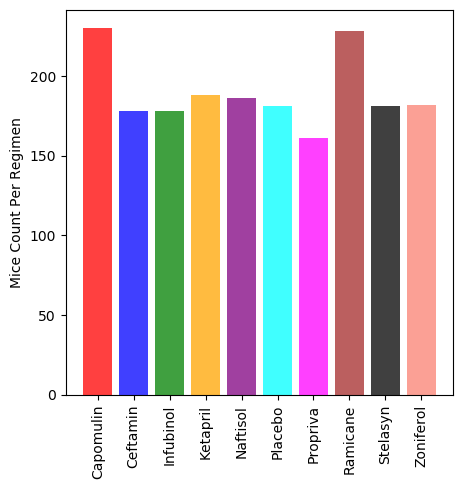

In [74]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
meeses = [230,178,178,188,186,181,161,228,181,182]
x_axis = np.arange(len(regimen_datapts))
plt.figure(figsize=(5,5))
plt.bar(x_axis,meeses,color=['red','blue','green','orange','purple','cyan','fuchsia','brown','black','salmon'],alpha=0.75,align='center')
plt.ylabel('Mice Count Per Regimen')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva','Ramicane', 'Stelasyn','Zoniferol'], rotation='vertical');
plt.show()

## Pie plots

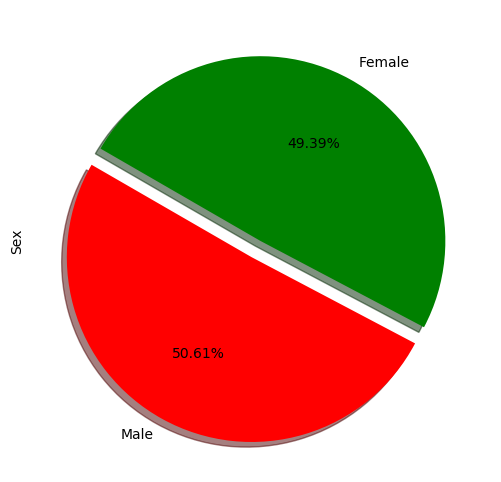

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mousegen = drugstudy_data[['Mouse ID','Sex']].copy()
m = mousegen.Sex
m = m.dropna(how='any')
counts = m.value_counts()
percent = m.value_counts(normalize=True)
totalm = m.count()
# totalm.dtype
mouse_gender = 100 * (counts/totalm)
#mouse_gender['Percentage By Gender'] = mouse_gender['Percentage of Gender']
colors = ['red', 'green']
explode = (0.1,0)
plot = mouse_gender.plot.pie(figsize=(8,6),\
            colors=colors,explode = explode,shadow=True,autopct="%1.2f%%",startangle=150)
                                             

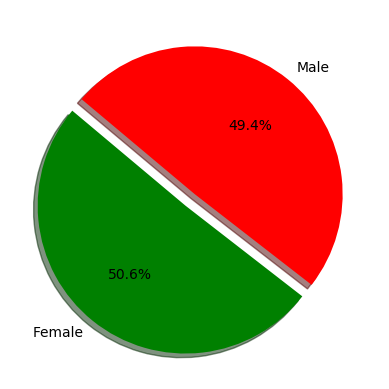

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mousegen['Sex'].unique()
sizes = m.value_counts('Male') * 100
labels = ['Female', 'Male'] 
colors = ['green', 'red']
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title = ('Gender Distribution')
plt.show()


## Quartiles, outliers and boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#. x = max()tumor - time
#y = x.merge(full_data) -->max #loc.(drugR = c)(timeF))
max_m = drugstudy_data.groupby(['Mouse ID']).max()
max_m = max_m.reset_index()

max_merged = max_m[['Mouse ID', 'Timepoint']].merge(drugstudy_data,on = ['Mouse ID','Timepoint'], how = 'left')
cap = max_merged.loc[max_merged['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ram = max_merged.loc[max_merged['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
inf= max_merged.loc[max_merged['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
cef= max_merged.loc[max_merged['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

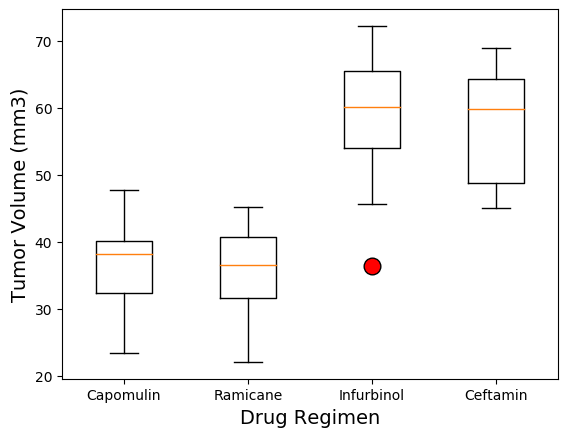

In [59]:
outie = dict(markerfacecolor = "red",markersize = 12)
plt.boxplot([cap, ram, inf, cef],labels=["Capomulin",'Ramicane','Infurbinol','Ceftamin'], flierprops = outie)
plt.xlabel('Drug Regimen',fontsize=14)
plt.ylabel('Tumor Volume (mm3)',fontsize=14)
plt.show()

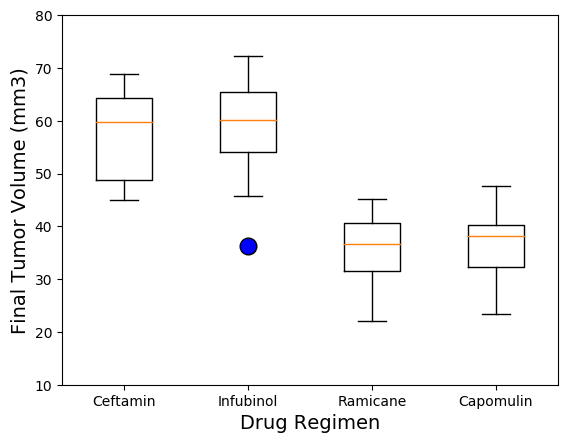

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bestof_regimen = max_merged[max_merged["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
bestof_regimen = bestof_regimen.sort_values(["Timepoint"], ascending=True)
regimen_data = bestof_regimen[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)' ]]
best4 = regimen_data['Drug Regimen'].unique()

regimen_data_sort = regimen_data.groupby(['Drug Regimen','Mouse ID']).last()['Tumor Volume (mm3)']
regimen_data_df = regimen_data_sort.to_frame()
# regimen_data_df
final_df = regimen_data_df.reset_index()
# final_df
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list) 
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(best4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
# Plotting the results
outie = dict(markerfacecolor = "blue",markersize = 12)
plt.boxplot(tumor_vols, labels=best4,flierprops = outie)
plt.ylim(10, 80)
plt.xlabel('Drug Regimen',fontsize=14)
plt.ylabel('Final Tumor Volume (mm3)',fontsize=14)
plt.show()

## Line and scatter plots

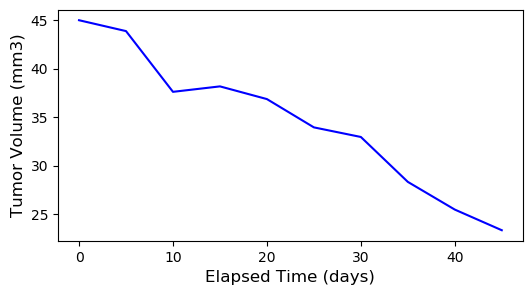

In [75]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_table = drugstudy_data.loc[drugstudy_data['Drug Regimen'] == 'Capomulin']
captable_r = cap_table[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
ElapsedT = captable_r.loc[captable_r['Mouse ID'] == 's185']
plt.figure(figsize=(6,3))
plt.plot(ElapsedT['Timepoint'],ElapsedT['Tumor Volume (mm3)'], color="blue", label = ("Time Versus Tumor Size"));
plt.xlabel('Elapsed Time (days)',fontsize=12)
plt.ylabel('Tumor Volume (mm3)',fontsize=12);

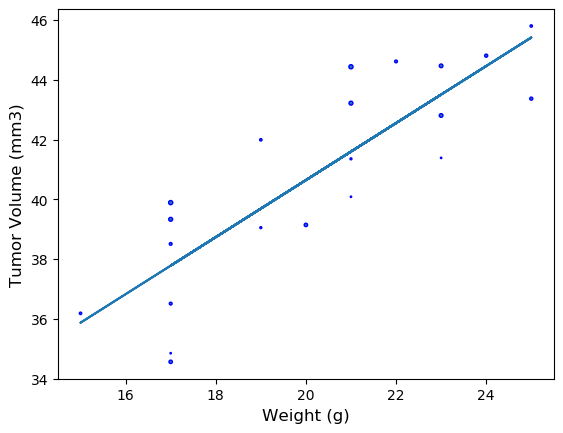

In [67]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
facelift = dict(markersize = 50, markerfacecolor = "blue")
aver = cap_table.groupby(['Mouse ID']).mean()
plt.scatter(aver['Weight (g)'],aver['Tumor Volume (mm3)'],marker="o",edgecolors="blue",s=x_axis,alpha=1.00);
m, b = np.polyfit(aver['Weight (g)'],aver['Tumor Volume (mm3)'],1)
plt.plot(x, m*x + b)
plt.xlabel('Weight (g)',fontsize=12)
plt.ylabel('Tumor Volume (mm3)',fontsize=12);

In [63]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regime
st.pearsonr(aver[('Weight (g)')], aver[('Tumor Volume (mm3)')]) 

(0.8419363424694716, 1.3225722434712883e-07)